## Activity 01

This activity is meant for you to start practicing with the ideas of inference, simulations, posteriors and Bayesian best practices. 

The Panoramic Survey Telescope & Rapid Response System ([Pan-STARRS](http://legacy.ifa.hawaii.edu/research/Pan-STARRS.shtml)) is a wide-field imaging telescope that is observing the sky repeatedly to conduct a number of Galactic and Extragalactic studies. The data are released periodically, and the catalogs includes measurements in five filters ([grizy](https://outerspace.stsci.edu/display/PANSTARRS/PS1+Filter+properties)) covering 30,000 square degrees of the sky, with typically ~12 epochs for each filter. 

The archive [interface](https://catalogs.mast.stsci.edu/panstarrs/) allows to search the second data release (DR2) and download all the multi-epoch observations for any object covered by the Survey.

In this activity, we will accurately estimate the flux of the standard star BD+28 4211. Standard stars are objects whose flux does not change with time (over sufficiently long timescales) and knowing their precise flux is extremely important in astronomy as it is used to remove instrumental effects from astronomical observations. 

The file BD+284211.csv includes repeated flux measurements for BD+28 4211 in the i filter, as a function of time.
The columns are as follows:

- objID      : object identifier	
- filterID	 : filter used for the observations 
- obsTime	 : time of the observation (Modified Julian Date at the midpoint of the observation) in days
- ra	     : Right Ascension of the object 
- dec	     : Declination of the object 
             (RA and Dec are analog of Latitude and longitude)
- psfFlux	 : flux of the star in Jy
- psfFluxErr : measurement error
- infoFlag2  : flag on the measurement [0 = good measurement, 32 = fitted with 2 PSF, problematic]

You will use these data to estimate the flux of BD+28 4211, and report the result. 

**1**
Perform a visual inspection of the data. Do you see anything unusual?

Have the fluxes remained constant during the observation period?

Anything special about the fluxes that have flags different from 0?

Plot the distribution of fluxes.

**2**
Clearly explain the statistical model you use, including the likelihood function and the prior that you chose. Clearly explain how you compute the constants for the prior.

**3**
Write a code to compute the model. Follow best practices when writing your code [you will share the code with us]. Make sure the code is well commented and can easily be read by humans. Check that the code's paths are not specific to your machine. For reproducibility, set the seed for the pseudo-random number generator explicitly to 5731. 

**4**
Plot the posterior distribution function, and compute the position of the posterior's maximum and its 95\% credible interval. 

**5**
Draw a random sample of size N=100 from the posterior distribution. Plot the distribution of this sample and compare it with the analytical expression. Compute the aritmetic mean and the difference between this and the mean of the posterior. Are they the same? 

Now consider 5 increasing values of N, from 10$^2$ to 10$^5$, linear in log step. For each sample compute the difference between the arithmetic mean and posterior mean. Comment on the trend between the difference and N.

**6**
Describe and justify any decisions you made. [E.g., what dis you do with the flagged measurements?]

**7**
Perform and describe a sensitivity analysis (i.e., discuss how the choice of the prior influences the result).



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BD+28 4211.csv')

In [5]:
import matplotlib.pyplot as plt

In [6]:
flag0 = df.loc[df['infoFlag2'] == 0]

In [8]:
flag32 = df.loc[df['infoFlag2'] == 32]

In [9]:
flag32

,objID,filterID,obsTime,ra,dec,airMass,psfFlux,psfFluxErr,infoFlag2
0,142623277801099039,3,55783.533723,327.780210,28.856972,1.10768,0.000012,0.000001,32
1,142623277801099039,3,55783.545668,327.780254,28.856969,1.14538,0.000011,0.000001,32
3,142623277801099039,3,56145.550525,327.780095,28.857105,1.13188,0.000010,0.000002,32
11,142623277801099039,3,56545.307819,327.780136,28.857054,1.08683,0.000009,0.000002,32


<AxesSubplot:xlabel='obsTime', ylabel='psfFlux'>

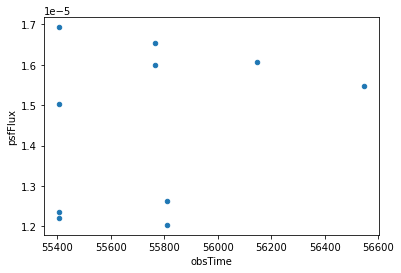

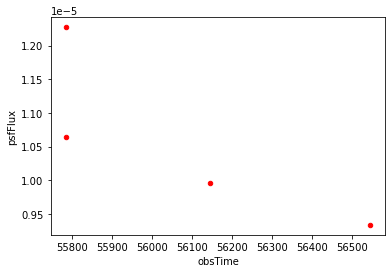

In [10]:
flag0.plot('obsTime', 'psfFlux', kind='scatter')
flag32.plot('obsTime', 'psfFlux', kind='scatter', color='red')

The fluxes have not stayed constant over the period of observation
the fluxed flagged 32 are numerically less that fluxes that are flagged 0

(array([2., 0., 1., 0., 4., 1., 0., 0., 0., 2., 2., 2.]),
 array([9.33562023e-06, 9.96826028e-06, 1.06009003e-05, 1.12335404e-05,
        1.18661804e-05, 1.24988204e-05, 1.31314605e-05, 1.37641005e-05,
        1.43967406e-05, 1.50293806e-05, 1.56620207e-05, 1.62946607e-05,
        1.69273007e-05]),
 <BarContainer object of 12 artists>)

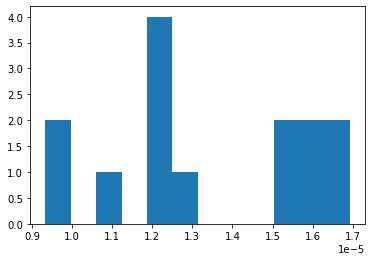

In [15]:
plt.hist(df['psfFlux'], bins=12)

The distribution of the fluxes does not look normal. But we need to consider that the number of observations is very low. so maybe the fact that it is somewhat centered around what it looks like is the mean is enough

Question 2
For the prior distribution: I do not have any prior knowlede of what the flux of a start might be centered around, so maybe choosing a normal distribution centered around 0 with a very high variance is a good choice. It kinda dictated the system that all the numbers close enough to zero have the same probability of happening. Which is not true.

for the likelihood function, we also choose a normal distribution which is centered around the mean of the data and it's variance is the mean of the flux error.

Thus, our posterior function also is a normal distribution. To define a normal distribution you just need the mean and the variance. To find the mean and the variance of the posterior distribution.

the mean is calculated the following way: 
\begin{align*}
\hat{\theta} = (\frac{n}{v} + \frac{1}{b})^{-1}(\frac{n\bar{x}}{v} + \frac{a}{b})\\
variance = (\frac{n}{v} + \frac{1}{b})^{-1}
\end{align*}


In [16]:
x_bar = df['psfFlux'].mean()

In [17]:
n = len(df['psfFlux'])

In [18]:
n

14

In [19]:
a = 0
b = 10
#Because I don't have any prior knowledge about theta, so I set the variance large! and mean to zero
v = df['psfFluxErr'].mean()


In [20]:
theta_bar = (n/v + 1/b)**(-1) * (n* x_bar/v + a/b)
theta_bar

1.3389646976123754e-05

In [21]:
post_var = (n/v + 1/b)**(-1)
post_var

1.1698209168704278e-07

Question 4

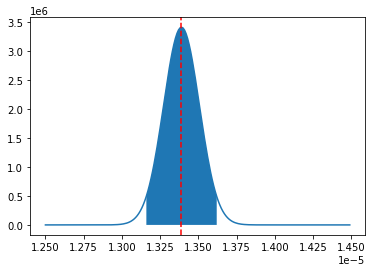

In [46]:
##########plotting the function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(1.25e-5, 1.45e-5, 0.00000001)
  

  
plt.plot(x_axis, norm.pdf(x_axis, theta_bar, post_var))
high = theta_bar + 2*(post_var)
low = theta_bar - 2*post_var
plt.fill_between(x_axis, norm.pdf(x_axis, theta_bar, post_var), where= (x_axis >low) & (x_axis < high))
plt.axvline(x=theta_bar, color='r', linestyle='--')

the above is the function of posterior disribution we found. 
the mean is the red line and 95% of mass is higlighted with blue